# Feature Engineering Notebook

This notebook visualizes and confirms the correctness of feature engineering functions.

In [1]:
# File: notebooks/feature_engineering.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from tradingbot.data.yfinance_downloader import download_stock_data
from tradingbot.features.ta_indicators import add_technical_indicators
from tradingbot.features.base_features import compute_daily_returns, compute_rolling_zscore

In [2]:
symbol = "AAPL"
df = download_stock_data(symbol, start="2023-01-01")
df = add_technical_indicators(df)
df["returns"] = compute_daily_returns(df)
df["zscore"] = compute_rolling_zscore(df["Close"])

2025-06-18 13:49:12.994 | INFO     | tradingbot.data.yfinance_downloader:download_stock_data:22 - Using cached data: data/AAPL_1d.csv


/Users/sahil/Documents/TradingBot/src/tradingbot/data/yfinance_downloader.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(path, index_col=0, parse_dates=True)
/Users/sahil/Documents/TradingBot/src/tradingbot/features/ta_indicators.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df.index, errors="coerce").notna()]


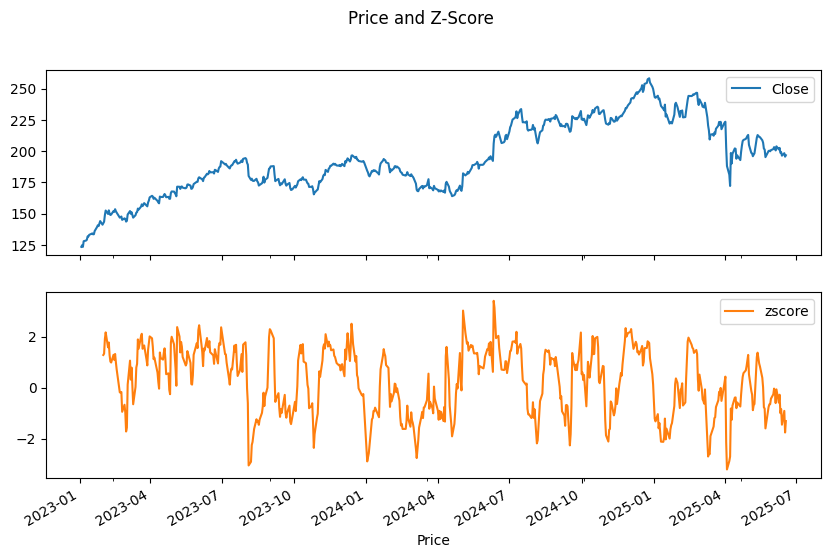

In [3]:
# Plotting
df[["Close", "zscore"]].plot(subplots=True, figsize=(10,6), title="Price and Z-Score")
plt.show()

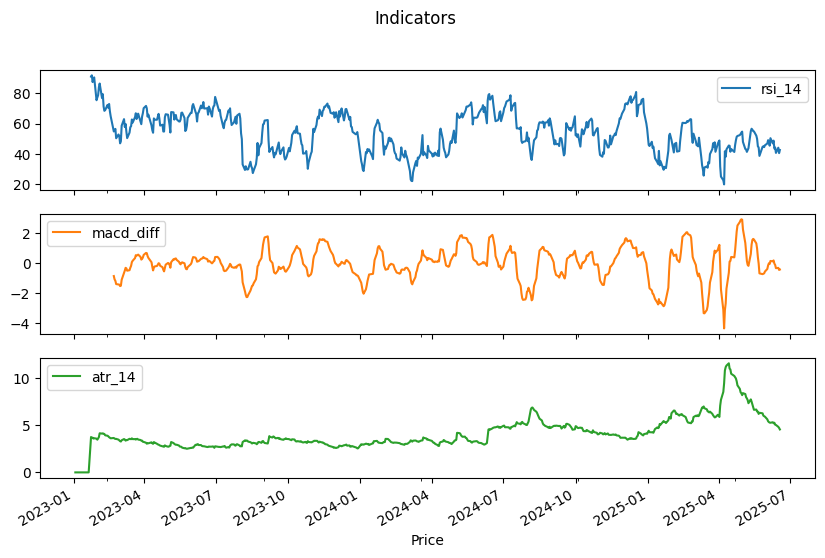

In [4]:
df[["rsi_14", "macd_diff", "atr_14"]].plot(subplots=True, figsize=(10,6), title="Indicators")
plt.show()

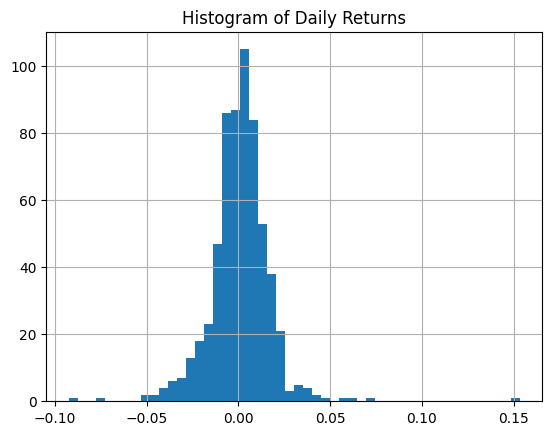

In [5]:
df["returns"].hist(bins=50)
plt.title("Histogram of Daily Returns")
plt.show()